# Árboles de decisión 
# Regresión

## Ejemplo 1
En este ejemplo usaremos un dataset sobre el consumo de gasolina y mediante el modelo de árboles de regresión vamos a predecir ciertos valores.

En primer lugar importaremos las librerías necesarias para el uso de este modelo

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

Cargamos el data set de "consumo de gasolina"

In [2]:
dataset = pd.read_csv('../data/petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Definimos los valores necesarios para la predicción del modelo

In [3]:
X = dataset.drop('Petrol_Consumption', axis=1)    # La matriz "X" con los valores  necesarios para la predicción
y = dataset['Petrol_Consumption']                 # El vector "y" será la columna a predecir

Para comenzar con el modelo, lo primero que debemos hacer es separar los datos en entrenamiento y prueba.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Importamos el algoritmo de árbol de regresión desde sklearn.tree, importamos DecisionTreeRegressor, con esto ya podemos empezar a utilizar todas las instrucciones contenidas en esta librería.

In [5]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Entrenamos el algoritmo utilizando la instrucción fit y los datos de entrenamiento.
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Realizamos una predicción utilizando los datos de prueba.

In [6]:
y_pred = regressor.predict(X_test)

Comparamos los valores reales del dataset con los que hemos logrado predecir mediante este modelo

In [7]:
compare_values = pd.DataFrame({'Valor Real':y_test, 'Valor Predicho':y_pred})
compare_values

,Valor Real,Valor Predicho
29,534,541.0
4,410,414.0
26,577,574.0
30,571,554.0
32,577,574.0
37,704,554.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,510.0


##### Podemos apreciar que los valores que se lograron predecir son valores muy cercanos a los reales, aunque no llegan a ser completamente iguales

## Ejemplo 2
Usaremos el conjunto de datos de Boston Housing para nuestro ejemplo de regresión. Este es otro conjunto de datos muy popular que contiene información sobre casas en los suburbios de Boston. Hay 506 muestras y 14 atributos. Para fines de simplicidad y visualización, solo usaremos dos - MEDV(valor medio de las casas ocupadas por el propietario en $ 1000) como objetivo y LSTAT(porcentaje del estado inferior de la población) como característica.


En primer lugar cargaremos el dataset el cual está contenido en la librería de sk-learn y en este caso crearemos a partir ese un dataset con los valores que necesitamos

In [8]:
bostonD = datasets.load_boston()            # Cargar el dataset de Boston
df = pd.DataFrame(bostonD.data[:, 12])      # Crear el DataFrame utilizando solo la columna de LSAT
df.columns = ['LSTAT']
df['MEDV'] = bostonD.target                 # Crear una nueva columna con los valores de MEDV
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


Usaremos DecisionTreeRegressor perteneciente a sk-learn para entrenar un árbol de regresión

In [9]:
from sklearn.tree import DecisionTreeRegressor    # Importamos el modelo de árbol de decisión regresion

X = df[['LSTAT']].values                          # Asignamos la matrix X (valores de LSTAT)
y = df['MEDV'].values                             # Asignamos el vector y (valores de MEDV)

sort_idx = X.flatten().argsort()                  # Ordenamos "X" y "y" por los valores ascendentes de X
X = X[sort_idx]
y = y[sort_idx]

tree = DecisionTreeRegressor(criterion='mse',     # Inicializamos y luego lo entrenamos con fit y los valores de "X" y "y"
                             max_depth=3)         
tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Logramos observar que nuestro criterio es diferente del que usamos para nuestro árbol de clasificación. La entropía como medida de impureza es un criterio útil para la clasificación. Sin embargo, para usar un árbol de decisión para la regresión, necesitamos una métrica de impureza que sea adecuada para variables continuas, por lo que definimos la medida de impureza utilizando el error cuadrado medio ponderado ( MSE ) de los nodos hijos y el árbol trendrá una profundidad 3 (max_depth)

Ahora, modelaremos la relación entre MEDV y LSTAT para ver cómo se ve la línea de un árbol de regresión.

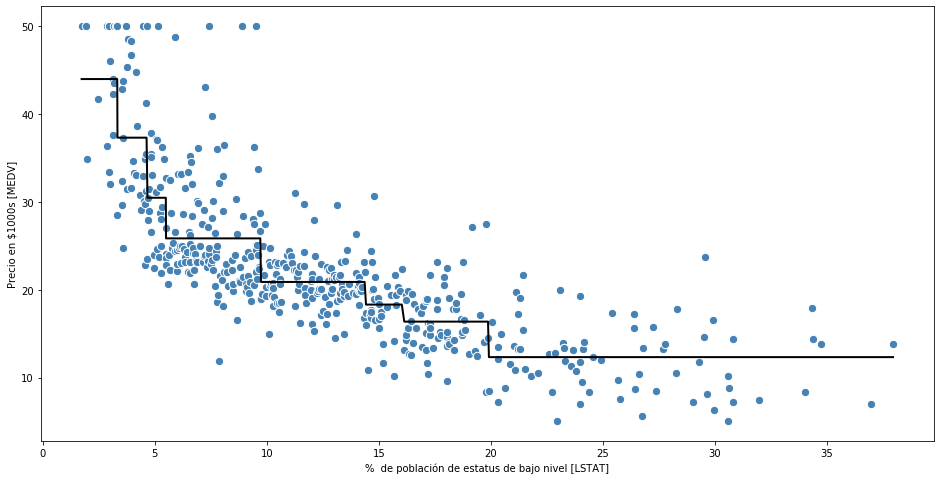

In [10]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                  # Plot del objetivo real contra las características
            edgecolor='white', s=70)
plt.plot(X, tree.predict(X),                      # Plot del objetivo predicho contra las caracteristicas
         color='black', lw=2)
plt.xlabel('%  de población de estatus de bajo nivel [LSTAT]')
plt.ylabel('Precio en $1000s [MEDV]')
plt.show()

##### Como podemos ver en la gráfica resultante, el árbol de decisión de profundidad 3 captura la tendencia general en los datos.

## Ejemplo 3
Acá vamos comenzar a preparar los datos para implementar el algoritmo de Árboles de Decisión Regresión. Utilizaremos el mismo dataset de Boston del ejemplo anterior

In [11]:
boston = datasets.load_boston()     # Cargar el dataset de Boston

Lo primero que debemos hacer es separar las variables independientes y la dependiente para convertirlos en lo que en nuestro programa llamaremos X_adr y y_adr. La primera corresponde a los datos ubicados en la columna 6 del dataset y la segunda variable corresponde a la columna de target.

In [12]:
# Seleccionamos solamente la columna 6 del dataset
X_adr = boston.data[:, np.newaxis, 5]
# Definnimos los datos correspondientes a las etiquetas
y_adr = boston.target

Si graficamos estos datos tenemos lo siguiente. Como podemos observar es un conjunto de datos que se encuentra distribuido de manera uniforme.

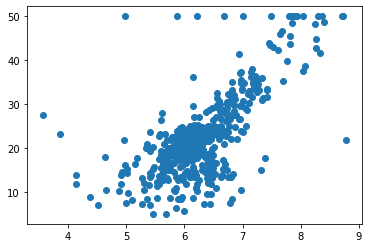

In [13]:
plt.scatter(X_adr, y_adr)
plt.show()

Para empezar a crear el modelo, lo primero que debemos hacer es separar los datos en entrenamiento y prueba.

In [14]:
from sklearn.model_selection import train_test_split
# Separamos los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_adr, y_adr, test_size=0.2)

Seguidamente importamos el algoritmo, por lo que definimos from sklearn.tree, importamos DecisionTreeRegressor, con esto ya podemos empezar a utilizar todas las instrucciones contenida en esta librería.

In [15]:
from sklearn.tree import DecisionTreeRegressor
# Definimos el algoritmo a utilizar
adr = DecisionTreeRegressor(max_depth = 5)

Definimos que el algoritmo indicando adr será igual a DecisionTreeRegressor y procedemos a realizar la configuración respectiva al mismo.

De acuerdo a lo visto anteriormente, tanto en la teoría como en la descripción de este algoritmo en Scikit Learn, esta instrucción cuenta con varias configuraciones que pueden ser modificadas, pero acá la que mas no interesa es max_depth ya que queremos evitar un sobreajuste en el modelo por lo que debemos detener que el árbol sea muy profundo. Este valor lo puedes modificar, para nuestro ejemplo vamos a utilizar max_depth igual a 5.

Definido esto, ahora si podemos entrenar el algoritmo utilizando la instrucción fit y los datos de entrenamiento.

In [16]:
# Entrenamiento del modelo
adr.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Seguidamente realizamos una predicción utilizando los datos de prueba.

In [17]:
#Realizo una predicción
Y_predic = adr.predict(X_prueba)

# Valores de la predicción
Y_predic

array([13.67878788, 13.67878788, 20.87613636, 13.67878788, 20.87613636,
       19.06603774, 17.7725    , 17.7725    , 24.81666667, 13.67878788,
       33.06111111, 19.06603774, 29.15454545, 20.87613636, 20.87613636,
       20.87613636, 28.025     , 19.06603774, 33.06111111, 20.87613636,
       17.7725    , 33.06111111, 13.67878788, 17.7725    , 13.67878788,
       24.81666667, 20.87613636, 20.87613636, 17.7725    , 19.06603774,
       19.06603774, 19.06603774, 19.06603774, 43.35714286, 19.06603774,
       19.06603774, 33.06111111, 19.06603774, 19.06603774, 17.7725    ,
       19.06603774, 17.7725    , 43.35714286, 19.06603774, 19.06603774,
       20.87613636, 20.87613636, 29.4       , 19.06603774, 45.82857143,
       20.87613636, 13.67878788, 20.87613636, 24.81666667, 20.87613636,
       19.06603774, 14.14285714, 19.06603774, 20.87613636, 19.06603774,
       20.87613636, 19.06603774, 24.81666667, 29.15454545, 17.7725    ,
       24.81666667, 19.06603774, 17.7725    , 13.67878788, 13.67

Realizado todo esto comparemos los valores obtenidos en nuestra predicción con los valores reales, para ver que tal es el comportamiento de nuestro modelo.

In [18]:
# Valores reales
y_prueba

array([13.1, 23.1, 26.4, 11.8, 24.4, 20. , 19.3, 21.8, 30.1, 20. , 33. ,
       17.2, 29.6, 12.1,  7.2, 25. , 22. , 21.9, 36.4, 20.6, 23.1, 33.8,
       14.4, 16.2, 14.4, 31.1, 14.9, 22. , 15.7, 21.4, 17.4, 23.3, 20.5,
       44. , 22.7, 21.2, 36.1, 18.5, 14.2, 18.2, 12.7, 19.8, 43.1, 22.6,
       36.2, 16.5, 29.4, 28.5, 20.3, 50. , 22.6, 11.9, 23. , 23.8, 25. ,
       22.1, 22.7, 13.5, 18.4, 18.7, 21.2, 17. , 22. , 35.4, 15.6, 27.9,
       19.2, 19.3, 10.4, 12. , 24.8, 21.2, 19.4, 31.2, 21.2, 29. , 10.2,
       30.1, 10.5, 50. , 22.4, 20.4, 16.2, 11.8, 23.1, 19.1, 50. , 21. ,
        9.6, 20.1, 22.2, 19.5, 27.1, 19.3, 16.6, 33.2, 12.8, 36.2, 12.5,
        8.5, 16.7, 13.3])

Si observamos con detenimiento estos datos nos podemos dar cuenta que en ciertos momentos los datos reales son muy parecidos con los datos que se han calculados mientras que en otros casos los datos son totalmente distintos.

Visualicemos los datos de entrenamiento junto con el modelo. Lo primero que vamos hacer es utilizar la instrucción arange para espaciar de manera uniforme los datos, el intervalo a utilizar será el valor mínimo y máximo de los datos de prueba y los pasos para el espaciado será de 0.1.

Una vez realizado esto, procedemos a utilizar la instrucción reshape para darle una nueva forma a la matriz de los datos y de esta forma puedan ser graficados.

Finalizado esto ya podemos graficar los datos pero ahora deberemos utilizar los datos X_grid y su respectiva predicción.

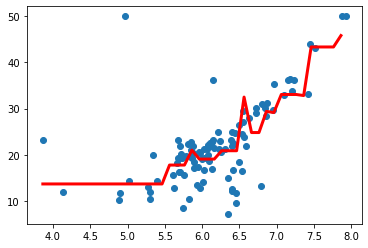

In [19]:
# Graficamos los datos de prueba junto con la predicción
X_grid = np.arange(min(X_prueba), max(X_prueba), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_prueba, y_prueba)
plt.plot(X_grid, adr.predict(X_grid), color='red', linewidth=3)

Como podemos observar acá el modelo no es una línea recta como la habiamos visto en los anteriores algoritmos, acá podemos observar que el modelo cuenta con subidas y bajadas.

Ahora veamos qué tal es la precisión del modelo utilizando la instrucción score.

In [20]:
# Precisión del modelo:
precision = adr.score(X_entrenamiento, y_entrenamiento)
precision

0.6896070125659362